# Training First Release Candidate for Model

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *
from meteo_imp.gaussian import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *
from fastcore.foundation import L

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch

from sklearn.decomposition import PCA

In [ ]:
reset_seed()

## Hai Big

In [ ]:
haiB = pd.read_parquet(hai_big_path)
hai_eraB = pd.read_parquet(hai_era_big_path)

In [ ]:
list(haiB.columns)

['TA', 'SW_IN', 'VPD', 'PA', 'P', 'WS', 'LW_IN']

In [ ]:
len(haiB.columns)

7

In [ ]:
dlsB = imp_dataloader(haiB, haiB, var_sel = list(haiB.columns), block_len=100, gap_len=15, bs=20, control_lags=[1], n_rep=5).cpu()

In [ ]:
modelB = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)

In [ ]:
items = [dlsB.valid.items[i] for i in [10, 50, 100, 200, 300, 400]]

In [ ]:
learnB = Learner(dlsB, modelB, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=rmse_gap)

In [ ]:
modelB.use_smooth = True

In [ ]:
learnB.fit(10, 1e-4)

epoch,train_loss,valid_loss,rmse_gap,time
0,134.015954,135.600556,0.628895,06:58
1,115.225596,93.459149,0.509007,06:44
2,79.720830,62.963418,0.440769,06:44
3,42.315201,40.177393,0.398360,06:41
4,23.284302,21.069833,0.365034,06:47
5,10.878581,5.061856,0.337237,06:39
6,0.594195,-8.622692,0.312828,06:29
7,-12.917427,-20.269316,0.292304,06:08
8,-26.010804,-30.028662,0.275892,06:07
9,-35.443113,-37.751035,0.261382,06:07


/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


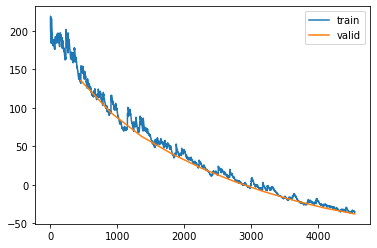

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
# torch.save(learnB.model, "trained_2_feb_gap_all_var_v1.pickle")

In [ ]:
# learnB.export("trained_2_feb_gap_all_var_v1")

In [ ]:
model0_state = modelB.state_dict()

In [ ]:
model2 = torch.load("trained_2_feb_gap_all_var_v1.pickle")

In [ ]:
model2.use_conditional

False

In [ ]:
# model2 = KalmanFilterSR.init_local_slope_pca(len(haiB.columns),len(haiB.columns), df_pca = None, pred_only_gap=True, use_conditional=False)
# model2.load_state_dict(model0_state)
learn2 = Learner(dlsB, model2, KalmanLoss(only_gap=True), cbs = [Float64Callback], metrics=rmse_gap)

In [ ]:
learn2.fit(4, 1e-4)

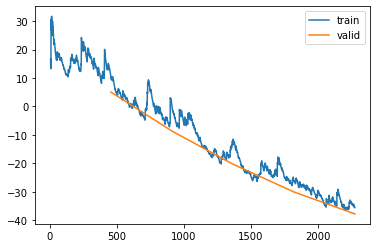

In [ ]:
learnB.recorder.plot_loss()

In [ ]:
show_results(learnB)

alt.HConcatChart(...)

In [ ]:
from meteo_imp.data import control_map

In [ ]:
with only_gap_ctx(learnB, False):
    display(show_results(learnB, items = items, control_map = control_map))

/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


KeyError: "None of [Index(['TA_ERA', 'SW_IN_ERA', 'VPD_ERA', 'PA_ERA', 'P_ERA', 'WS_ERA',\n       'LW_IN_ERA'],\n      dtype='object')] are in the [columns]"